# KMeans from scratch

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import pylab as pl
from IPython import display
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

## Algorithm
**Input:**  
- `X`: an array of shape `(N,d)` whose rows are samples and columns are features
- `k`: number of clusters
- `init`: "random" or an array of shape (k,d)  
if "random", `k` points are chosen randomly from X as the initial cluster centers  
if an array, the array is used as the initial cluster centers

**Output:**  
A tuple `(y_new, centers)`.  
- `y_new`: an array of shape `(N,)` that records the labels in `(0, ..., k-1)` of each sample 
- `centers`: an array of shape `(k,d)` that records the cluster centers

**Steps:**
1. Initialize a collection of centers $\mu_0,\ldots,\mu_{k-1}$:  
    - if `init` is an array, the centers are the rows of `init` . 
    - if `init=="random"`, the centers are chosen as `k` random rows of `X` .  
2. Label each sample ${\bf x}_i$ by $j$ if $\mu_j$ is the closed center to ${\bf x}_i$.
3. Call the points with label $j$ as group $j$.  Update $\mu_j$ as the center of points in group $j$.  
4. Repeat Steps 2 and 3 until `y_new` do not change anymore.

## Pseudocode
Translate the algorithm into the pseudocode.  
This helps you to identify the parts that you don't know how to do it.  

    1. let X be an array.
    2. Create an distance function
    3. Function KMeans_scratch(X, k, init = "random"):
       (N, d) = (the rows of X, the columns of X) 
       If init == "random":
         Choose k random rows from X and set them as the initial centers
       Else:
         Use the provided array as the initial centers
    
       Calculate the distance matrix between X and the initial centers
       Assign each sample to the closest center and record the labels in y
    
       For i in range(k):
         Find all samples in X that have label i and store them in group_i
         Update centers[i] as the mean of group_i
    
       Calculate the distance matrix between X and the updated centers
       Assign each sample to the closest center and record the labels in y_new
    
       If y_new is not equal to y:
         Call KMeans_scratch recursively with the updated centers as the new init
        
      Return y_new and centers
    

      

    

## Code

In [ ]:
### your answer here

import random

def dist_mtx(X, Y):
    X_col = X[:, np.newaxis, :]
    Y_row = Y[np.newaxis, :, :]
    dist = np.linalg.norm(X_col - Y_row, axis=-1)
    return dist

def KMeans_scratch(X, k, init = "random"):
    N,d = X.shape
    if init == "random":     
        centers = np.array( random.choices(X, k=k) )
    else: 
        centers = np.array( init )

    dist = dist_mtx(X, centers)
    y = dist.argmin(axis=1)

    for i in range(len(centers)):
      group = X[y==i]
      centers[i] = group.mean(axis=0)
    
    dist = dist_mtx(X, centers)
    y_new = dist.argmin(axis=1)
      
    if not np.array_equal(y_new, y) :
      y_new, centers = KMeans_scratch(X, k, centers)
         
    return (y_new, centers)



## Test
Take some sample data from [KMeans-with-scikit-learn](KMeans-with-scikit-learn.ipynb) and check if your code generates similar outputs with the existing packages.

##### Name of the data
Description of the data.

<ipython-input-2-06d9e4d45174>:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if init == "random":


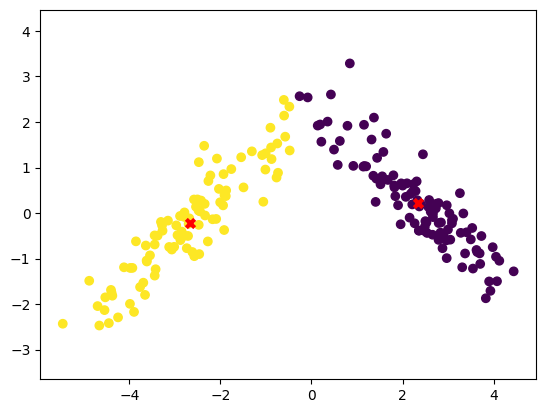

In [ ]:

mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])

### results with your code
y, centers = KMeans_scratch(X, 2)
plt.axis('equal')
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(centers[:,0], centers[:,1], c='red', linewidths=3, marker = 'x')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


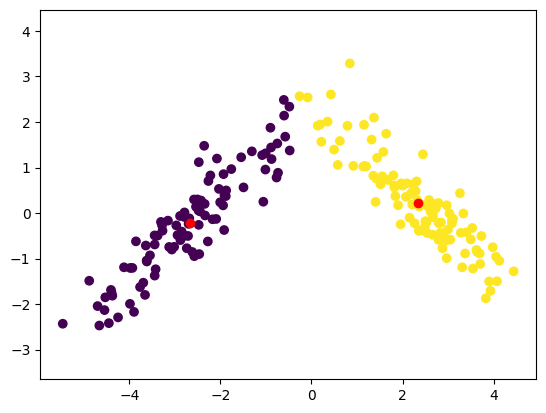

In [ ]:
### results with existing packages

from sklearn.cluster import KMeans
model = KMeans(2)
y_new = model.fit_predict(X)

plt.axis('equal')

plt.scatter(*X.T, c=y_new)
plt.scatter(*model.cluster_centers_.T, c='r')

## Comparison

##### Exercise 1
Modify your code so that it prints the inertia at each iteration.  
Is it decreasing?

In [ ]:
def distance_mtx(X, Y):
    X_col = X[:, np.newaxis, :]
    Y_row = Y[np.newaxis, :, :]
    diff = X_col - Y_row
    return np.linalg.norm(diff, axis=2)

In [ ]:
### your answer here
# X: an array of shape (N,d)
# k: number of clusters
# init: "random" or an array of shape (k,d), which means the initial points 
def MyKmeans(X, k, init = "random"):
    n = X.shape[0] #n is the number of points
    center = 0 #store the center of each group
    inertia = 0 #store the inertia
    if(init == "random"):
        center = X[np.random.choice(range(n), k, replace=False)]
    else:
        center = init
    label = np.array([0. for i in range(n)])
    
    #label every point first
    dist_mtx = distance_mtx(X, center)
    label = np.argmin(dist_mtx, axis=1) #lable the point with the index of minimun in array dist_to_centers
    #compute the inertia of first result
    inertia = np.sum( np.min(dist_mtx, axis=1)**2 )
    
    times = 0 #record the times that label updates
    #repeat to label all the points until the label result is same as before
    pre_label = np.array([-1. for i in range(n)])
    
    while(not np.array_equal(label, pre_label)):
        #
        times += 1
        #print the inertia
        print("inertia =", inertia)
        inertia = 0
        
        pre_label = np.copy(label)        
        #count the mean to find the new center
        for i in range(k):
            group = X[np.where(label == i)]
            center[i] = np.mean(group, axis = 0)
        #label every point
        dist_mtx = distance_mtx(X, center)
        label = np.argmin(dist_mtx, axis=1) #lable the point with the index of minimun in array dist_to_centers
        #compute the inertia of first result
        inertia = np.sum( np.min(dist_mtx, axis=1)**2 )
        
    print("update times :", times)
    return label, center

In [ ]:
my_lable, my_center = MyKmeans(X, 9)

inertia = 63.099999999999994
inertia = 36.55886968817974
inertia = 32.0979919448447
inertia = 31.51797457738766
inertia = 31.17115601761606
inertia = 31.115474161735698
inertia = 31.097111944903578
inertia = 31.05574305555555
inertia = 31.00478079496261
inertia = 30.961861904761903
inertia = 30.89146331681711
update times : 11


In [ ]:
### it is a function that plot the result of labeling at each iteration
# X: an array of shape (N,d)
# k: number of clusters
# init: "random" or an array of shape (k,d), which means the initial points 
def AnimatedMyKmeans(X, k, init = "random", frame_time = 1.1):
    n = X.shape[0] #n is the number of points
    center = 0 #store the center of each group
    if(init == "random"):
        center = X[np.random.choice(range(n), k, replace=False)]
    else:
        center = init
    label = np.array([0. for i in range(n)])
    
    #label every point first
    dist_mtx = distance_mtx(X, center)
    label = np.argmin(dist_mtx, axis=1) #lable the point with the index of minimun in array dist_to_centers
    
    times = 0 #record the label update times
    #repeat to label all the points until the label result is same as before
    pre_label = np.array([-1. for i in range(n)])
    while(not np.array_equal(label, pre_label)):
        #
        times += 1
        #update a frame of the animation
        plt.scatter(X[:,0], X[:,1], c = label)
        display.clear_output(wait=True)
        display.display(plt.show())
        time.sleep(frame_time)
        
        pre_label = np.copy(label)
        #count the mean to find the new center
        for i in range(k):
            group = X[np.where(label == i)]
            center[i] = np.mean(group, axis = 0)
        #label every point
        dist_mtx = distance_mtx(X, center)
        label = np.argmin(dist_mtx, axis=1) #lable the point with the index of minimun in array dist_to_centers
    
    print("update times :", times)
    return label, center

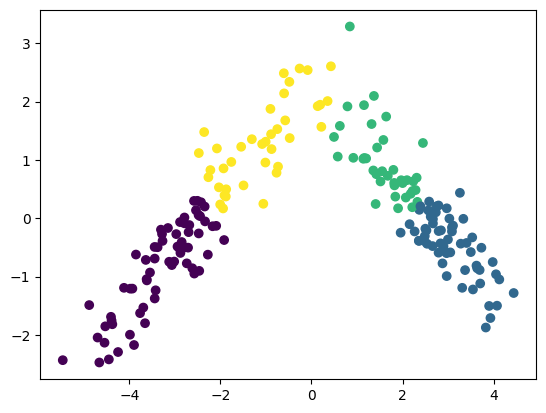

None

update times : 5


In [ ]:
#re run this cell, and you will see the process of kmeans
my_lable, my_center = AnimatedMyKmeans(X, 4)

##### Exercise 2
Let  
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y_iris = iris.target
```

###### 2(a)
Use your function to apply the $k$-means algorithm with $k=3$.  
What is the inertia?  
Run it several times to see if the results are always the same.  

In [ ]:
### your answer here

from sklearn.datasets import load_iris  # load iris dataset
iris = load_iris()
X = iris.data
y_iris = iris.target


#we try 5 times, and the inertia may not be same every time
for i in range(5):
    inertia = 0
    my_lable, my_center = MyKmeans(X, 3)
    
    for k in range(3):
        X_pick = X[np.where(my_lable == k)]
        inertia += np.sum((X_pick - my_center[k])**2)

    print("inertia =", inertia)

inertia = 220.61000000000007
inertia = 85.97871700680274
inertia = 84.26527300347223
inertia = 83.39023263888893
inertia = 82.00418738904196
inertia = 81.08093414092332
inertia = 79.87357983461305
inertia = 79.34436414532675
inertia = 78.92130972222222
update times : 9
inertia = 78.85566582597731
inertia = 1471.4400000000003
inertia = 150.76709108963664
inertia = 145.09721363471084
inertia = 144.17125349400817
inertia = 143.74764944714195
inertia = 143.56290177914732
inertia = 143.51378065600676
inertia = 143.3103517573068
inertia = 142.91289812522643
inertia = 142.8049513888889
inertia = 142.77336161700458
update times : 11
inertia = 142.75406249999997
inertia = 128.58999999999997
inertia = 79.114603515625
update times : 2
inertia = 78.85144142614601
inertia = 1026.91
inertia = 264.62463812329077
inertia = 141.54482721282906
inertia = 97.22009506784627
inertia = 86.79831757154352
inertia = 80.14155669793828
inertia = 79.19714263977781
update times : 7
inertia = 78.85144142614601
inert

###### 2(b)
Use `sklearn.cluster.KMeans` to apply the $k$-means algorithm with $k=3$.  
What is the inertia?  
Run it several times to see if the results are always the same.  

In [ ]:
### your answer here
#we try 5 times, and the inertia are all same
for i in range(5):
    model = KMeans(n_clusters = 3)
    model.fit(X)
    print("inertia =", model.inertia_)
#the result shows all the five number=78.851441426146

inertia = 78.851441426146
inertia = 78.851441426146
inertia = 78.851441426146
inertia = 78.851441426146
inertia = 78.851441426146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

###### 2(c)
Pick a label `labels` that you like.  
Compute the cluster centers of `X` corresponding to `labels` .  
Is this inertia bigger or smaller than the previous two answers?

In [ ]:
### your answer here
#we choose the labels y_rand which were randomly choosed
y_rand = np.random.randint(3, size=X.shape[0])
rand_inertia = 0

for i in range(3):
    X_pick = X[np.where(y_rand == i)]
    clus_center = np.mean(X_pick, axis = 0)
    rand_inertia += np.sum((X_pick - clus_center)**2)

print("inertia in random =", rand_inertia)
#this is much greater than the previous ans, 
#since it doesn`t consider the clusters of each points, 
#which makes the points in the same group may be so "far"

inertia in random = 662.8289381270904


###### 2(d)
The label `y_iris` is the "correct" real-world answer.  
Compute the cluster centers and the inertia.  
Is this inertia bigger or smaller than the answers in 2(a) and 2(b)?

In [ ]:
### your answer here
real_inertia = 0

for i in range(3):
    X_pick = X[np.where(y_iris == i)]
    center = np.mean(X_pick, axis = 0)    
    real_inertia += np.sum((X_pick - center)**2)
    

print("real inertia =", real_inertia)
#and it is bigger than the result in 2(b), and sometimes bigger than the result in 2(a)

real inertia = 89.29740000000001


#### Veronica:

Comparing to 2(a), it is either bigger or smaller.
Comparing to 2(b), it is slightly bigger.

##### Exercise 3
The $k$-means algorithm is a deterministic algorithm once the initial cluster centers have been determined.  
Therefore, your function and `sklearn.cluster.KMeans` should obtain the same result when `init` is given.  
Check if this is true.  

Note:  There are still many subtle differences, for example, `sklearn` uses the location of centers to test the convergence but our algorithm uses the label to test the convergence.

In [ ]:
### your answer here
#we print the result of sklearn.cluster.KMeans 5 times
#with initial center point is fixed (X[2], X[4], X[6])
init = np.array([X[2], X[4], X[6]])

for i in range(5):
    model = KMeans(n_clusters = 3, init = init)
    model.fit(X)
    print("result label by model :\n", model.labels_)
    
#and the results are all same

result label by model :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
result label by model :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
result label by model :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
result 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cl

In [ ]:
#we print the result of MyKmeans 5 times
#with initial center point is fixed (X[2], X[4], X[6])
init = np.array([X[2], X[4], X[6]])

for i in range(5):
    my_lable, my_center = MyKmeans(X, 3, init = init)
    print("result label by MyKmeans:\n", my_lable)
    
#as we can see , the results are all same between our function and sklearn.cluster.KMeans

inertia = 1806.19
inertia = 229.00343648589669
inertia = 104.29224667355439
inertia = 88.83095772737767
inertia = 84.95217943238866
inertia = 84.0127788886515
inertia = 83.04698186876976
inertia = 81.74960206772622
inertia = 80.80637600000001
inertia = 79.87357983461305
inertia = 79.34436414532675
inertia = 78.92130972222222
update times : 12
result label by MyKmeans:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
inertia = 78.8556658259773
update times : 1
result label by MyKmeans:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2

<ipython-input-26-0c9236b15179>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(init == "random"):
